In [1]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import datetime                                  # manipulating date formats

# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

In [2]:
######### 1. Time series plot
# EXAMPLE 1: confirmed covid cases in sf

covid_dt = pd.read_csv('./data/covid_sf_confirmed.csv')
covid_dt.head()

,Date,CaseCount,CumCases
0,2020-03-03,2,2
1,2020-03-05,7,9
2,2020-03-07,5,14
3,2020-03-08,1,15
4,2020-03-10,6,21


In [3]:
#formatting the date column correctly
covid_dt.Date=covid_dt.Date.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))

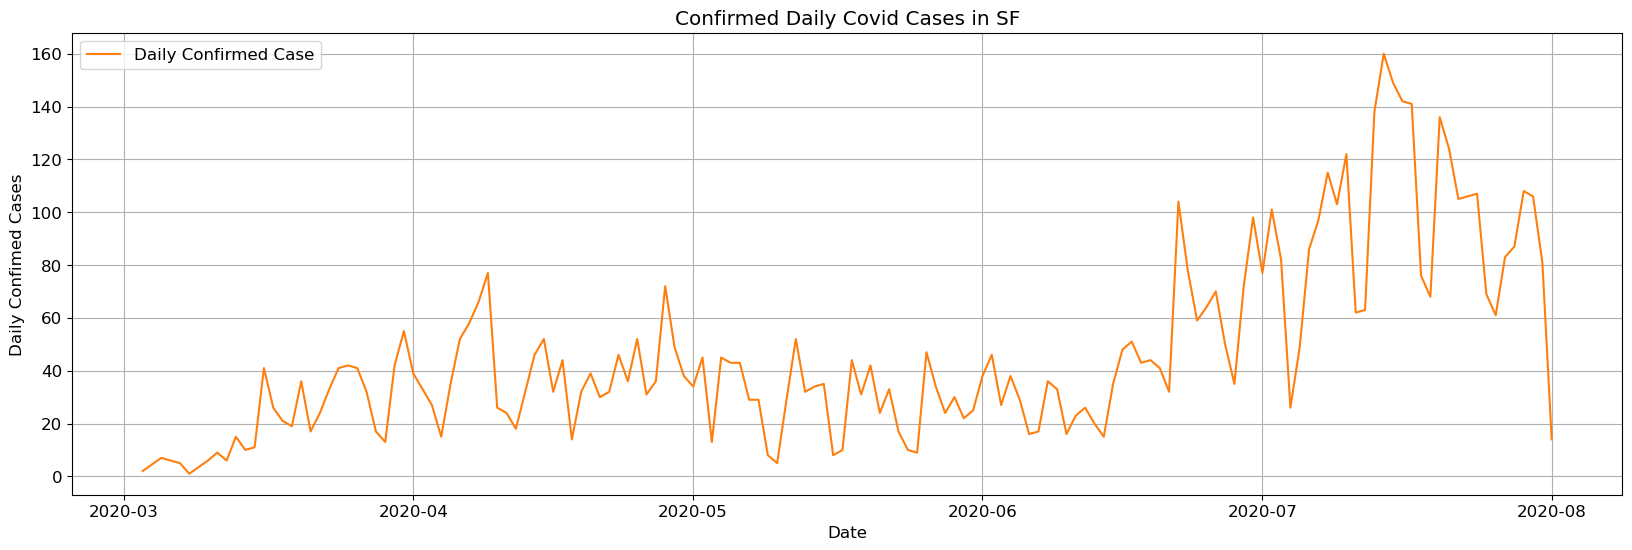

In [4]:
#time series plot
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 6))

# Specify how our lines should look
ax.plot(covid_dt.Date, covid_dt.CaseCount, color='tab:orange', label='Daily Confirmed Case')

# Same as above

ax.set_xlabel('Date')
ax.set_ylabel('Daily Confimed Cases')
ax.set_title('Confirmed Daily Covid Cases in SF')
ax.grid(True)
ax.legend(loc='upper left');

In [5]:
#we can have multiple time series in the same plot
#ax.plot(covid_dt.Date, covid_dt.CumCases, color='tab:green', label='Cummulative Cases')
#ax.legend(loc='upper left')
#fig

In [7]:
# another approach for changing Date type when reading data
# and install as index
covid_dt = pd.read_csv('./data/covid_sf_confirmed.csv',index_col=['Date'], parse_dates=['Date'])
covid_dt.head()

,CaseCount,CumCases
Date,,
2020-03-03,2,2
2020-03-05,7,9
2020-03-07,5,14
2020-03-08,1,15
2020-03-10,6,21


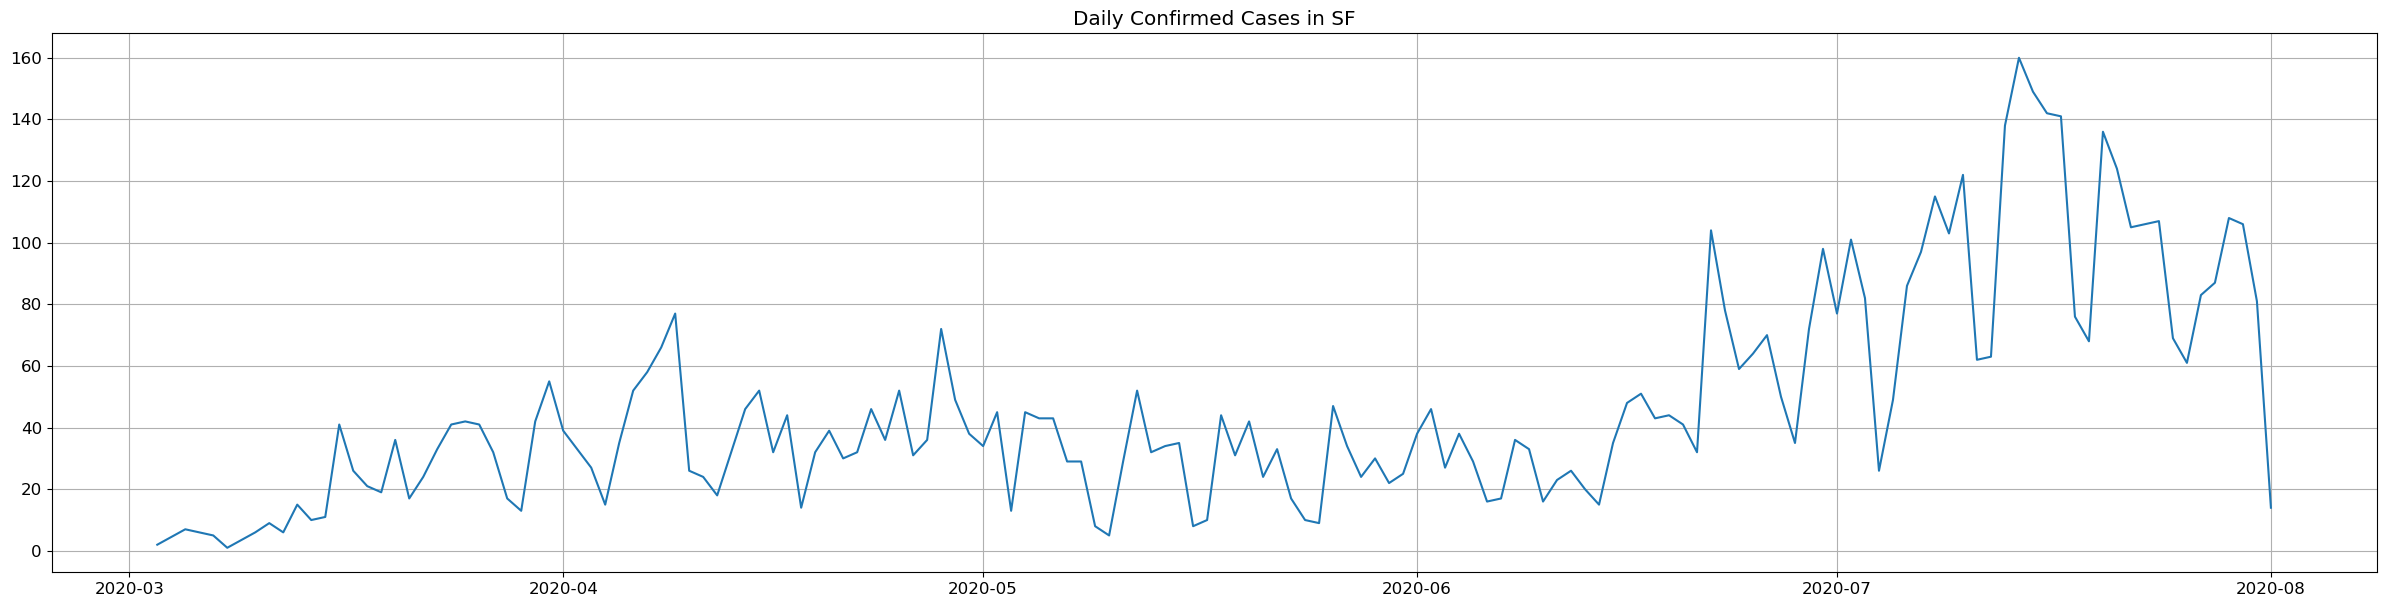

In [8]:
plt.figure(figsize=(30, 7))
plt.plot(covid_dt.CaseCount)
plt.title('Daily Confirmed Cases in SF')
plt.grid(True)
plt.show()

In [11]:
#For some types of data, time series plot can observe obvious trend and seasonality

#EXAMPLE 2: Weather
weather_dt = pd.read_csv('./data/daily-minimum-temperatures.csv', index_col=['Date'], parse_dates=['Date'])

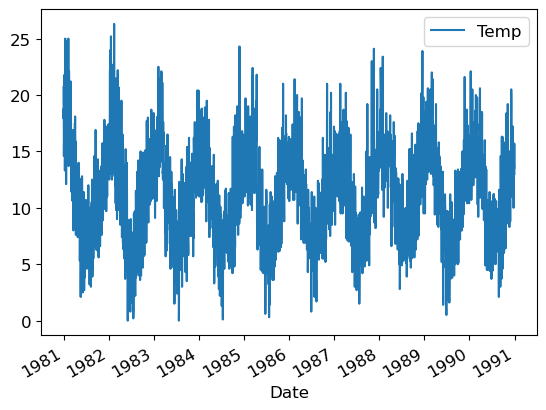

In [12]:
weather_dt.plot()
plt.show()

In [13]:
######### 2. Moving average smoothing 
weather_dt.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [14]:
weather_dt.rolling(window=3).mean()

,Temp
Date,
1981-01-01,NaN
1981-01-02,NaN
1981-01-03,19.133333
1981-01-04,17.100000
1981-01-05,16.400000
...,...
1990-12-27,13.833333
1990-12-28,14.066667
1990-12-29,13.700000


In [15]:
weather_dt.rolling(window=2, center=True).mean()

,Temp
Date,
1981-01-01,NaN
1981-01-02,19.30
1981-01-03,18.35
1981-01-04,16.70
1981-01-05,15.20
...,...
1990-12-27,14.30
1990-12-28,13.80
1990-12-29,13.55


In [16]:
#def a moving average plot
def plotMovingAverage(series, window, plot_actual=False, scale=1.96):

    rolling_mean = series.rolling(window=window,center=True).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    
    if plot_actual:
        plt.plot(series[window:], label="Actual values", color='#878a88', alpha=0.5)
        
    plt.legend(loc="upper left") 
    plt.grid(True)

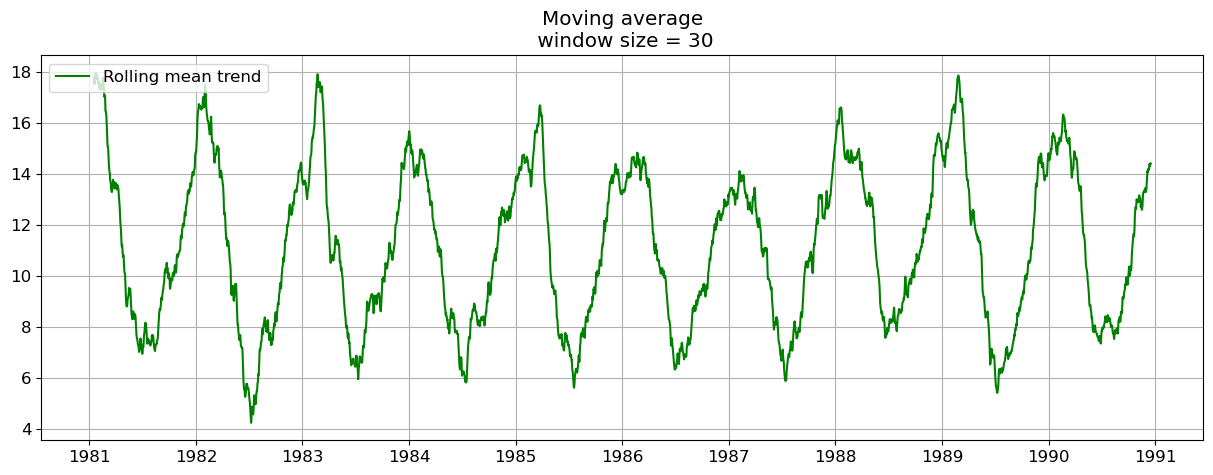

In [17]:
plotMovingAverage(weather_dt, 30)         # Monthly

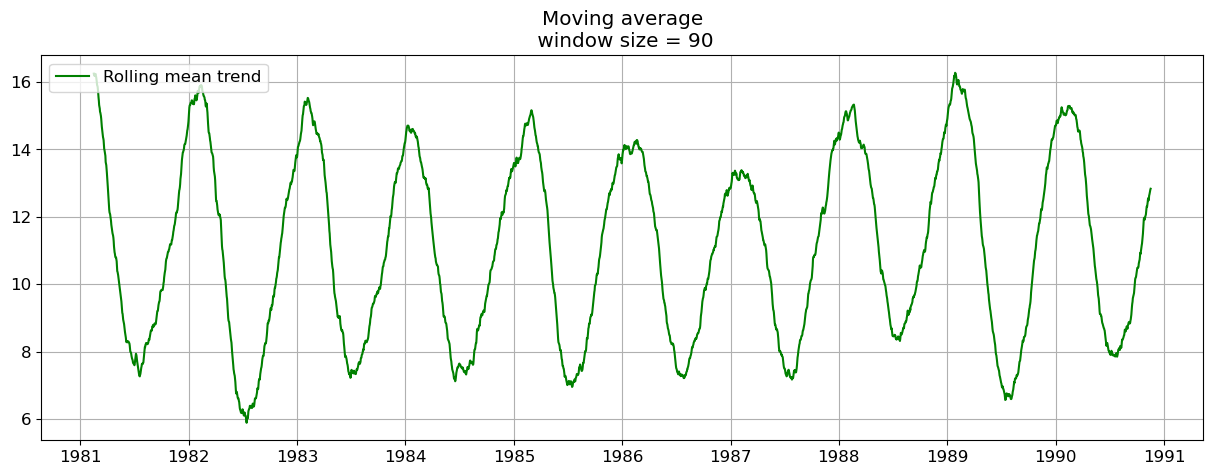

In [18]:
plotMovingAverage(weather_dt, 90)       #Seasonally, much smoothed now

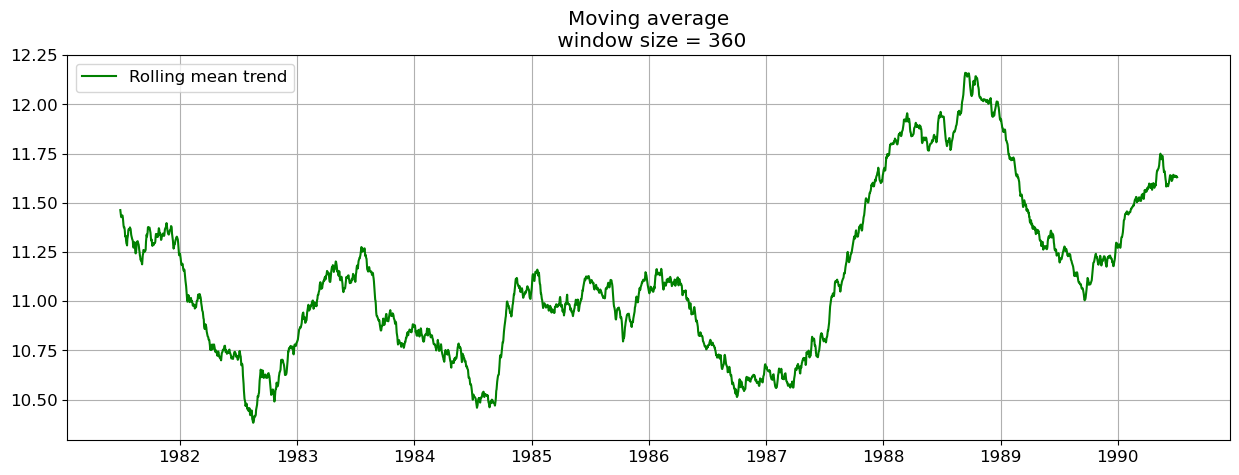

In [19]:
plotMovingAverage(weather_dt, 360)       #Yearly, observe some yearly changes

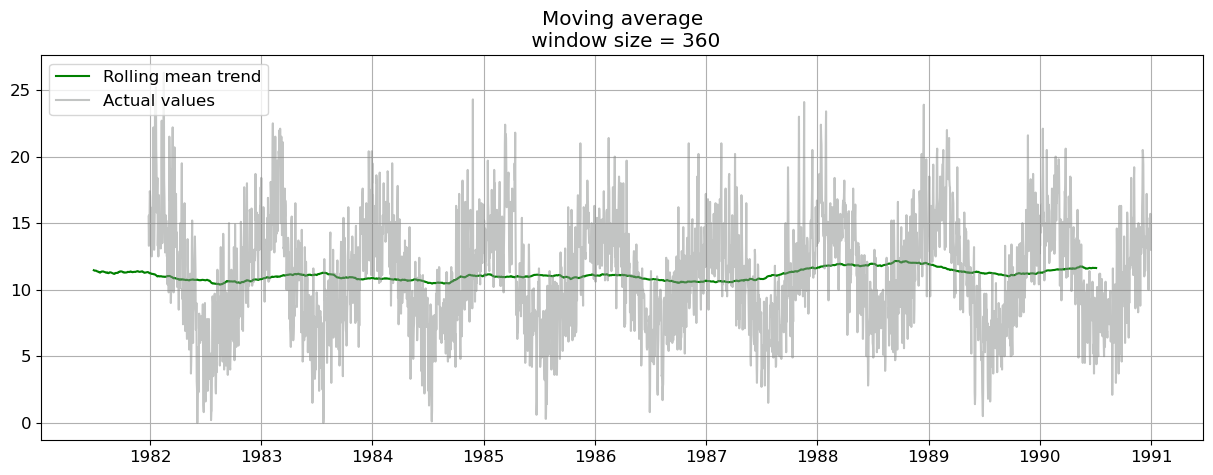

In [20]:
#add orginal data
plotMovingAverage(weather_dt, 360,plot_actual=True)

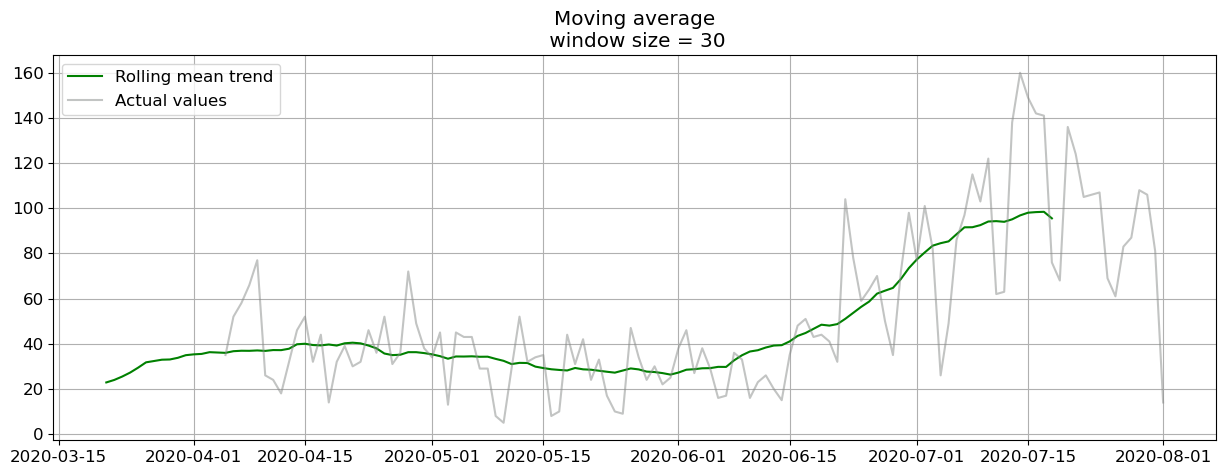

In [21]:
plotMovingAverage(covid_dt.CaseCount, 30, plot_actual=True) 

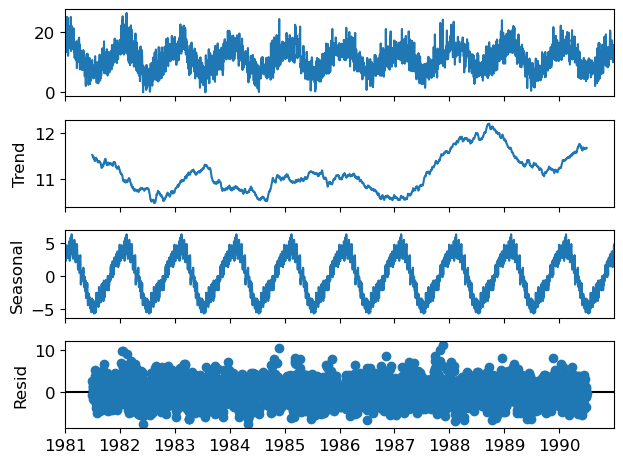

In [22]:
#classical decomposition
#addictive
res = sm.tsa.seasonal_decompose(weather_dt,period=365,model="addictive")
fig = res.plot()

<Axes: xlabel='Date'>

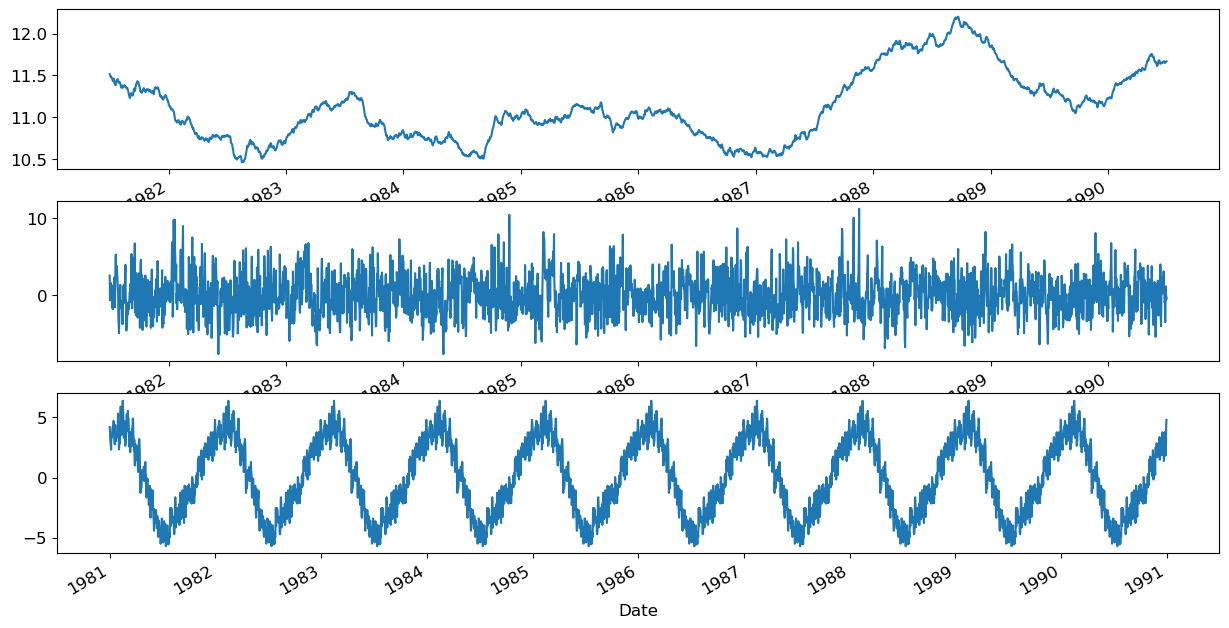

In [23]:
#make it bigger
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1)
res.resid.plot(ax=ax2)
res.seasonal.plot(ax=ax3)

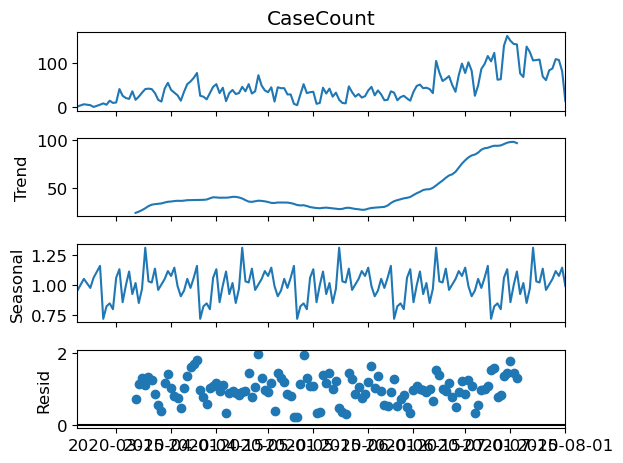

In [24]:
#multiplicative
res = sm.tsa.seasonal_decompose(covid_dt.CaseCount,period=30,model="multiplicative")
fig=res.plot()

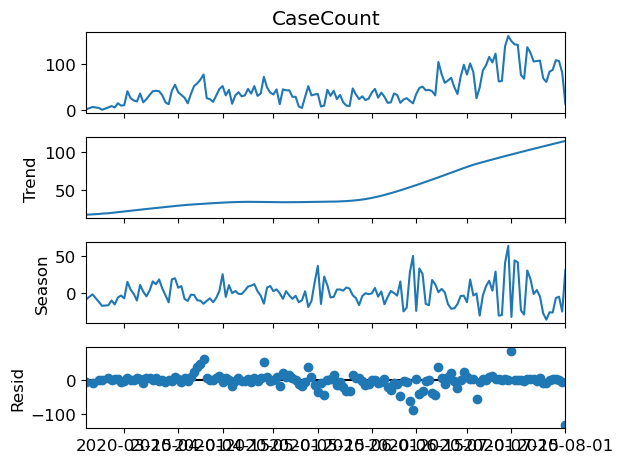

In [25]:
#optional: STL decomposition
from statsmodels.tsa.seasonal import STL
stl = STL(covid_dt.CaseCount, period=30,robust=True)
res = stl.fit()
fig = res.plot()

<b> Practice </b>

Let's work on the `apple-iphone-quarterly-sales.csv`

- Draw the time series plot and describe the components (trend, seasonality, cycle and abnomalies) you have observed.
- Try moving-average smoothing with different window size to show the general smoothed trend of this data.
- Perform the classical decomposition to estimate the trend, seasonlity and noises of this data

In [28]:
sales = pd.read_csv('./data/apple-iphone-quarterly-sales.csv',index_col=['Time'], parse_dates=['Time'])
sales.head()

,iPhone
Time,
Q2/07,0.270
Q3/07,1.119
Q4/07,2.315
Q1/08,1.703
Q2/08,0.717


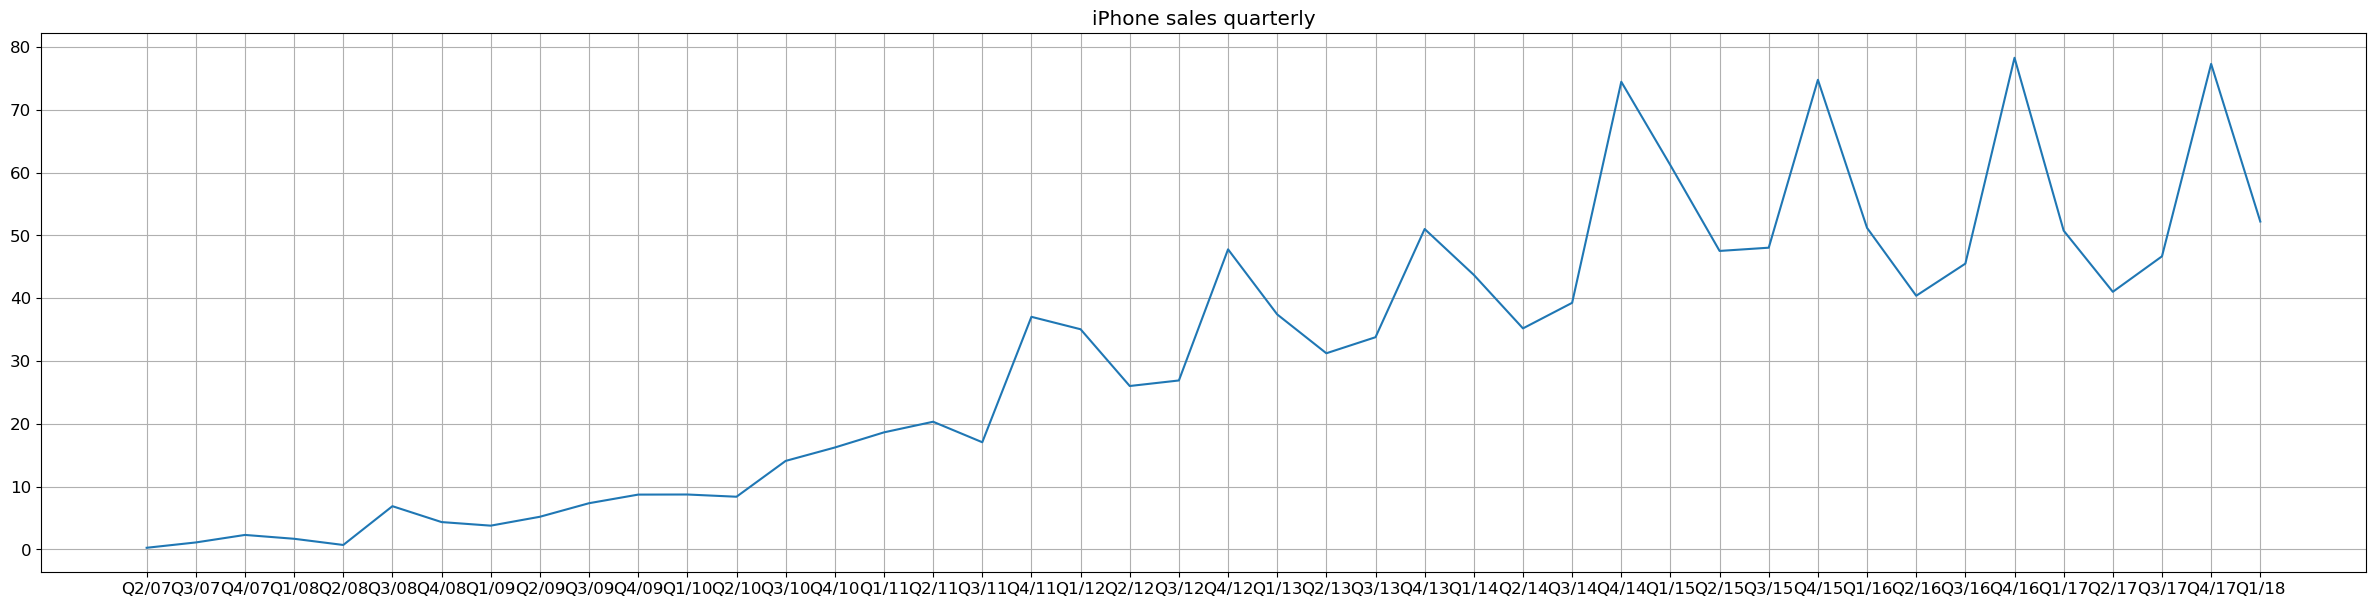

In [30]:
plt.figure(figsize=(30, 7))
plt.plot(sales.iPhone)
plt.title('iPhone sales quarterly')
plt.grid(True)
plt.show()

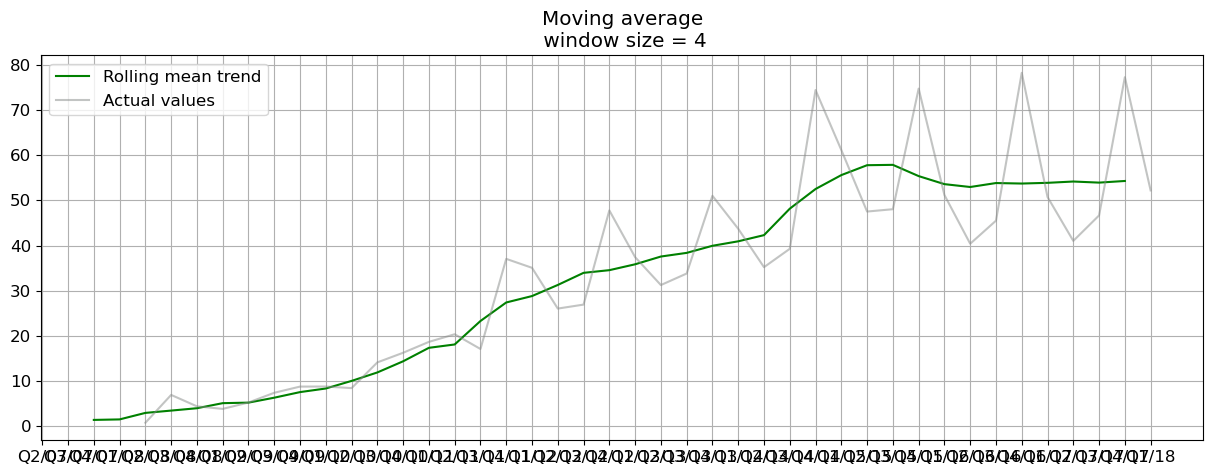

In [32]:
plotMovingAverage(sales.iPhone, 4, plot_actual=True) 

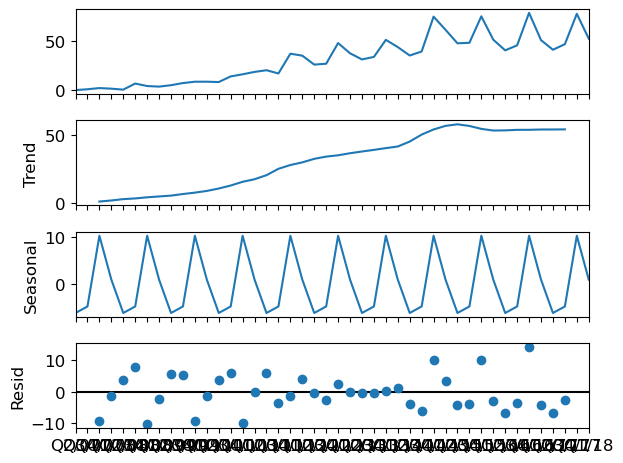

In [40]:
res = sm.tsa.seasonal_decompose(sales.iPhone,period=4,model="addictive")
fig = res.plot()

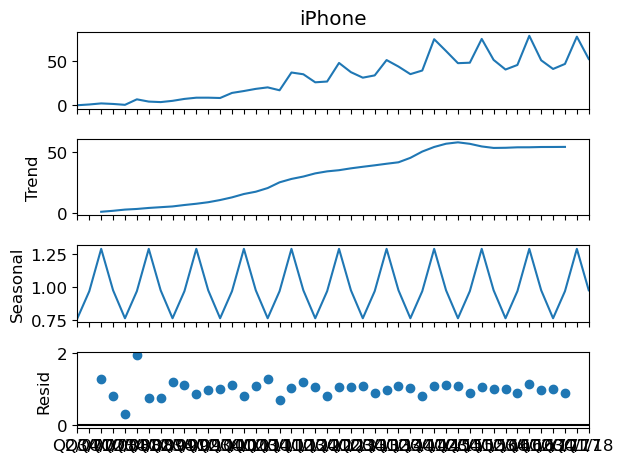

In [41]:
res = sm.tsa.seasonal_decompose(sales.iPhone,period=4,model="multiplicative")
fig=res.plot()